

# Project : Movielens Dataset Analysis


## Document Details ##

Name : Anant Kumar Srirangam <br>
Date : 23 Sept'2018 <br>
Project : Data Science - Movielens Dataset Analysis

In [2]:
#importing librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [3]:
# load the data sets

user   = pd.read_csv('users.dat',sep="::",lineterminator='\r',header=None)
movies = pd.read_csv('movies.dat',sep="::",lineterminator='\r',header = None)
rating = pd.read_csv('ratings.dat',sep="::",lineterminator='\r',header = None)


/Users/cyber/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cyber/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/Users/cyber/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as

In [23]:
print user
print movies
print rating

         0  1   2   3      4
0        1  F   1  10  48067
1        2  M  56  16  70072
2        3  M  25  15  55117
3        4  M  45   7  02460
4        5  M  25  20  55455
5        6  F  50   9  55117
6        7  M  35   1  06810
7        8  M  25  12  11413
8        9  M  25  17  61614
9       10  F  35   1  95370
10      11  F  25   1  04093
11      12  M  25  12  32793
12      13  M  45   1  93304
13      14  M  35   0  60126
14      15  M  25   7  22903
15      16  F  35   0  20670
16      17  M  50   1  95350
17      18  F  18   3  95825
18      19  M   1  10  48073
19      20  M  25  14  55113
20      21  M  18  16  99353
21      22  M  18  15  53706
22      23  M  35   0  90049
23      24  F  25   7  10023
24      25  M  18   4  01609
25      26  M  25   7  23112
26      27  M  25  11  19130
27      28  F  25   1  14607
28      29  M  35   7  33407
29      30  F  35   7  19143
...    ... ..  ..  ..    ...
6010  6011  M  35  15  80538
6011  6012  M  35  15  02871
6012  6013  F 

In [4]:
user.columns = ['UserID','Gender','Age','Occupation','Zip Code']
movies.columns = ['MovieID','Title','Genres']
rating.columns = ['USerId','MovieID','Rating','Timestamp (s)']


In [5]:
user.describe()
user['Gender'].describe()

count     6040
unique       2
top          M
freq      4331
Name: Gender, dtype: object

In [296]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [8]:
print rating.describe()
print "\n\n"
print rating['Rating'].describe()

             USerId       MovieID        Rating  Timestamp (s)
count  1.000209e+06  1.000209e+06  1.000209e+06   1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00   9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00   1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00   9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00   9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00   9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00   9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00   1.046455e+09



count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


  Age Group  Count
0    1 - 18    222
1   18 - 24   1103
2   25 - 34   2096
3   35 - 44   1193
4   45 - 50    550
5   50 - 55    496
6       56+    380


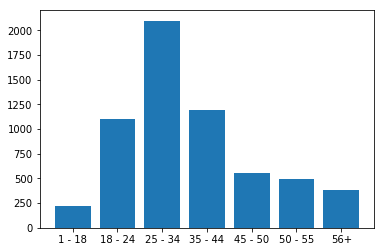

In [94]:
ageGroup = pd.DataFrame(user['Age'])
ageGroup.columns=['Age']

ageGroup.loc[ageGroup['Age'] == 1, 'Age Group'] = "1 - 18"
ageGroup.loc[ageGroup['Age'] == 18, 'Age Group'] = "18 - 24"
ageGroup.loc[ageGroup['Age'] == 25, 'Age Group'] = "25 - 34"
ageGroup.loc[ageGroup['Age'] == 35, 'Age Group'] = "35 - 44"
ageGroup.loc[ageGroup['Age'] == 45, 'Age Group'] = "45 - 50"
ageGroup.loc[ageGroup['Age'] == 50, 'Age Group'] = "50 - 55"
ageGroup.loc[ageGroup['Age'] ==56, 'Age Group'] = "56+"

ageCount = ageGroup.groupby('Age Group').size().reset_index(name = 'Count')

print ageCount

plot.bar(ageCount['Age Group'],ageCount['Count'])
plot.show()


## Inference ##

Majority of the users lie in the age group 25-34

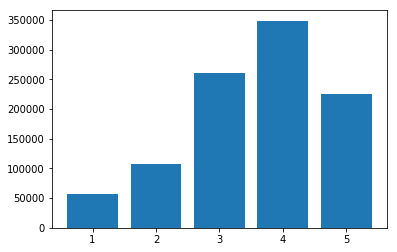

In [97]:
ratingCount = rating.groupby('Rating').size().reset_index(name='Count')

plot.bar(ratingCount['Rating'],ratingCount['Count'])
plot.show()

In [99]:
print movies

      MovieID                                              Title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                   

## VISUALIZATION ##

Ratings for all the sequels of Toy Story

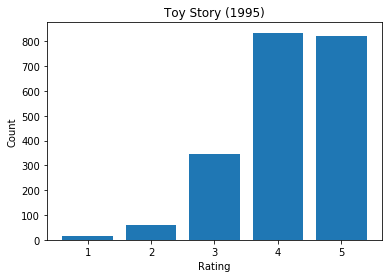

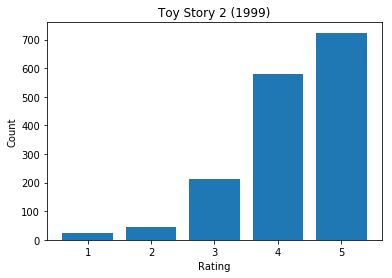

"\nmovieCount = pd.DataFrame(rating[rating['MovieID']==movieId[0]]['Rating'],columns=['Rating'])\nratingCount = movieCount.groupby('Rating').size().reset_index(name='Count')\n\nmovieCount = pd.DataFrame(rating[rating['MovieID']==movieId[1]]['Rating'],columns=['Rating'])\nratingCount2 = movieCount.groupby('Rating').size().reset_index(name='Count')\n\nprint ratingCount,ratingCount2\n"

In [174]:
movieId = list(movies[movies['Title'].str.contains("Toy Story")]['MovieID'])
#movieId = list(pd.DataFrame(movieId)
#print movieId

ind = 0
for val in movieId:
    movieCount = pd.DataFrame(rating[rating['MovieID']==val]['Rating'],columns=['Rating'])
    ratingCount = movieCount.groupby('Rating').size().reset_index(name='Count')
    movieName = list(movies[movies['MovieID']==val]['Title'])[0]
    
    #print ratingCount
    plot.bar(ratingCount['Rating'],ratingCount['Count'])
    plot.title(movieName)
    plot.ylabel('Count')
    plot.xlabel('Rating')
    plot.show()
'''
movieCount = pd.DataFrame(rating[rating['MovieID']==movieId[0]]['Rating'],columns=['Rating'])
ratingCount = movieCount.groupby('Rating').size().reset_index(name='Count')

movieCount = pd.DataFrame(rating[rating['MovieID']==movieId[1]]['Rating'],columns=['Rating'])
ratingCount2 = movieCount.groupby('Rating').size().reset_index(name='Count')

print ratingCount,ratingCount2
'''

## Viewership of Toy Story by Age Group

We can use the ageGroup dataframe previously created for displaying the age group
and retrieve the viewership from Rating dataframe
The IDs for all the Toy Story sequels are present in movieId list

  Age Group  Count
0    1 - 18    112
1   18 - 24    448
2   25 - 34    790
3   35 - 44    423
4   45 - 50    143
5   50 - 55    108
6       56+     53


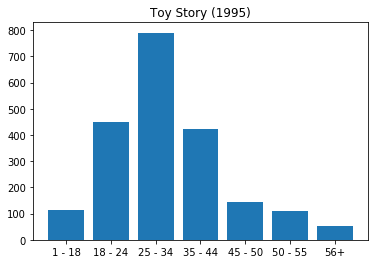

  Age Group  Count
0    1 - 18     99
1   18 - 24    331
2   25 - 34    578
3   35 - 44    342
4   45 - 50    112
5   50 - 55     72
6       56+     51


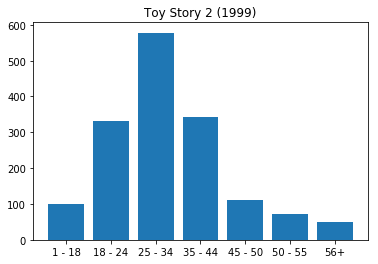

In [253]:
for id in movieId:
    userId = pd.DataFrame(rating[rating['MovieID']==id]['UserId'])
    userId.columns=['UserID']
    #print userId
    userId = userId.merge(user, on=['UserID'], how='left', indicator=True)
    userId.drop('_merge',axis=1,inplace=True)
    userId = userId.merge(ageGroup, on=['Age'], how='left',indicator=True)
    userId = userId.groupby(['UserID','Age','Age Group']).size().reset_index(name='Count')
    #userId = userId.copy(deep=True)
    userId.drop('Count',axis=1,inplace=True)
    movieAgeGroup = userId.groupby('Age Group').size().reset_index(name='Count')
    print movieAgeGroup
    plot.bar(movieAgeGroup['Age Group'],movieAgeGroup['Count'])
    plot.title(list(movies[movies['MovieID']==id]['Title'])[0])
    plot.show()

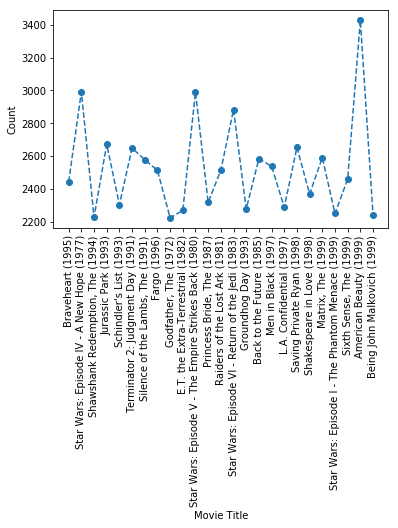

In [287]:
movieGroup = rating.groupby(['MovieID']).size().reset_index(name='Count').sort_values('Count',ascending=False)
movieGroup = movieGroup.merge(movies,on=['MovieID'],indicator=True,how='left').head(25).sort_values('MovieID')
plot.plot(movieGroup['Title'],movieGroup['Count'],'o--')
plot.ylabel('Count')
plot.xlabel('Movie Title')
xaxis = movieGroup['Title']
plot.xticks(range(len(xaxis)),xaxis,rotation='vertical')
plot.show()

#print movieGroup

## INFERENCE ##

American Beauty has the highest viewership

## Scenario : 
Need to find out ratings for User with User ID : 2696

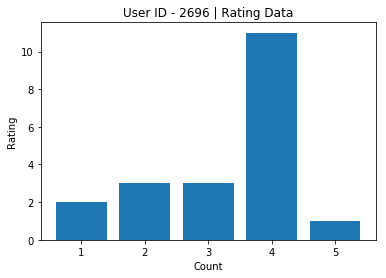

   Rating  UserId  Count
0       1    2696      2
1       2    2696      3
2       3    2696      3
3       4    2696     11
4       5    2696      1


In [294]:
## Use rating dataframe

userGroup = rating[rating['UserId']==2696]
userGroup = userGroup.groupby(['Rating','UserId']).size().reset_index(name='Count')
plot.bar(userGroup['Rating'],userGroup['Count'])
plot.ylabel('Rating')
plot.xlabel('Count')
plot.title('User ID - 2696 | Rating Data')
plot.show()
print userGroup

## Scenario

Features     : MovieID, Age, Occupation
Label/Target : Rating   
Record Set   : Random 500 records ( from rating dataset)

In [337]:
data = pd.DataFrame(rating.sample(n = 500))


In [338]:
data.drop('Timestamp (s)',axis=1,inplace=True)

data.columns=['UserID','MovieID','Rating']
data = data.merge(user,on=['UserID'],indicator=True,how='left')
data.drop(['Gender','Zip Code','_merge'],inplace=True,axis=1)

print data

     UserID  MovieID  Rating  Age  Occupation
0      5627     3040       3   25           0
1       815     3114       3   25           4
2      2765     2406       4   50           7
3      1168      736       2   25           0
4      4188     1367       4   50           7
5      3712      208       4   25          17
6      5636     1211       4   25           7
7      4578     1639       4   25           0
8      1230     1356       5   25          11
9      3471     3064       1   18           4
10     5249     2497       4   45          14
11     1147     3091       4   25          20
12     2659     1580       2   35          14
13     3910      534       4   25          20
14     1150      806       2   25          20
15     1160     2395       4   18          14
16     5359     1221       5   18          16
17     3036     3360       5   56          13
18     4384     1587       5   25           0
19     5972     3450       4   25          20
20     3808      481       4   25 

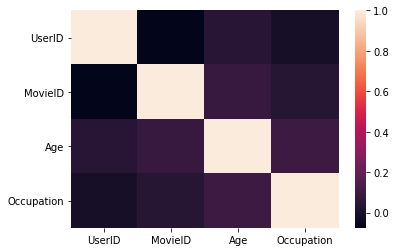

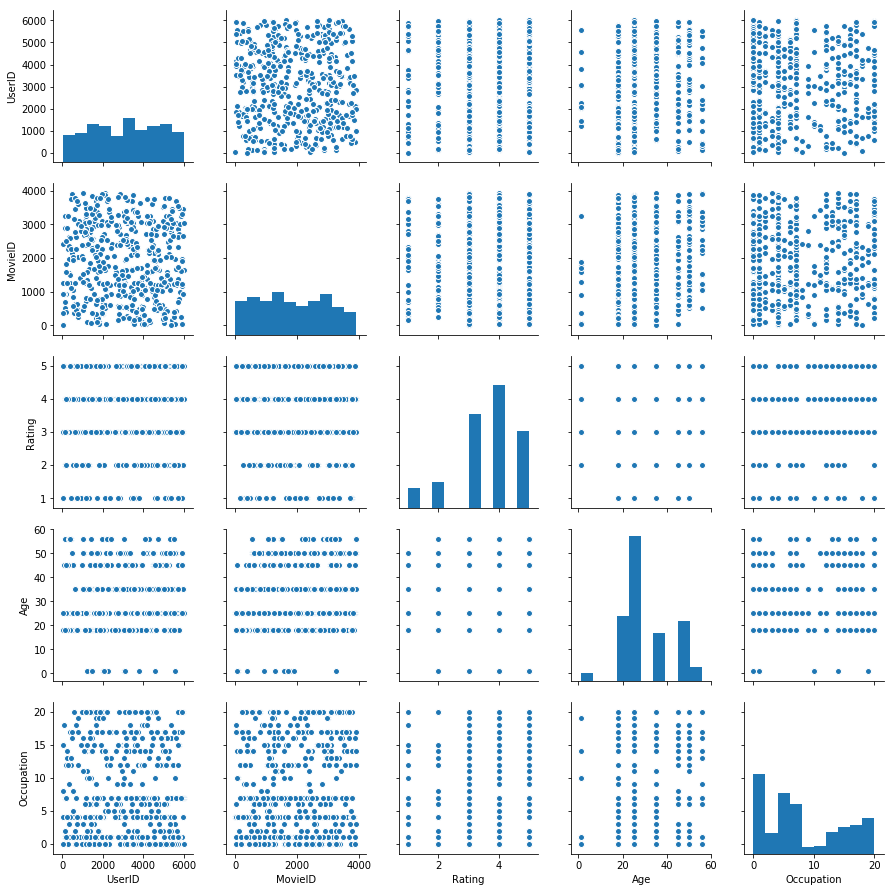

In [367]:
sb.heatmap(data[['UserID','MovieID','Age','Occupation']].corr())
sb.pairplot(data)

In [356]:
features = data[['UserID','MovieID','Age','Occupation']]
target = data['Rating']

In [359]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=5)

print x_train.shape,x_test.shape,y_train.shape,y_test.shape

lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

predict = lm.predict(x_test)
print predict

(400, 4) (100, 4) (400,) (100,)
[3.75405544 3.6577898  3.43379923 3.67629304 3.64690131 3.69288103
 3.4084073  3.59053752 3.54905006 3.76585772 3.45807721 3.53486876
 3.83053149 3.79803712 3.70925543 3.52785719 3.55402207 3.43171959
 3.61875864 3.47045191 3.58000033 3.60813312 3.59980805 3.63900084
 3.66561487 3.81492573 3.55303456 3.83998584 3.66762642 3.52701906
 3.56359935 3.58302843 3.69622346 3.73393604 3.86100543 3.90949898
 3.59573196 3.63719934 3.34955575 3.78992867 3.64387379 3.83340145
 3.58329281 3.6921019  3.55814275 3.59226336 3.41035891 3.67217748
 3.45342063 3.43093952 3.72749581 3.73458545 3.62966358 3.65800104
 3.79003272 3.59116889 3.76987628 3.52742036 3.4858827  3.80393653
 3.49382983 3.51230549 3.4651614  3.39213605 3.45109797 3.39446113
 3.7082599  3.52777039 3.65356641 3.44454928 3.61021044 3.69952023
 3.91886795 3.97643921 3.70825356 3.54677348 3.36958957 3.45386008
 3.71219315 3.61391786 3.51236077 3.6950357  3.75491282 3.77129588
 3.5384567  3.56443394 3.31984

In [362]:
print model.score(x_test,y_test)
print lm.intercept_
print lm.coef_

-0.04706409606162353
3.3110262302537405
[ 2.02234641e-05 -5.85456319e-05  8.36093915e-03  1.29788515e-02]


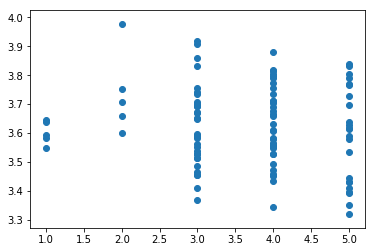

In [363]:
plot.scatter(y_test,predict)
plot.show()

(array([50., 56., 51., 64., 49., 43., 51., 60., 42., 34.]),
 array([2.0000e+00, 3.9450e+02, 7.8700e+02, 1.1795e+03, 1.5720e+03,
        1.9645e+03, 2.3570e+03, 2.7495e+03, 3.1420e+03, 3.5345e+03,
        3.9270e+03]),
 <a list of 10 Patch objects>)

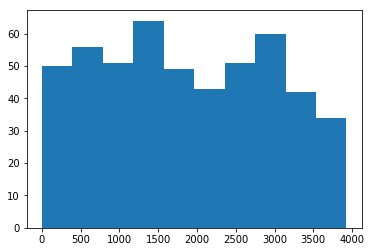

In [370]:
plot.hist(data['MovieID'])

- **Age is chosen from the following ranges:**

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"



(array([ 11.,   0.,   0.,  96., 213.,   0.,  71.,   0.,  88.,  21.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

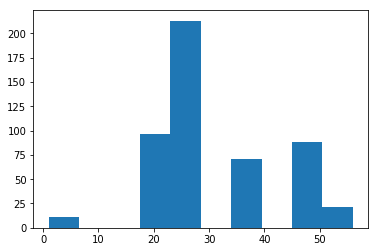

In [371]:
plot.hist(data['Age'])

- **Occupation is chosen from the following choices:**

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

(array([117.,  31.,  90.,  73.,  10.,  12.,  32.,  40.,  42.,  53.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

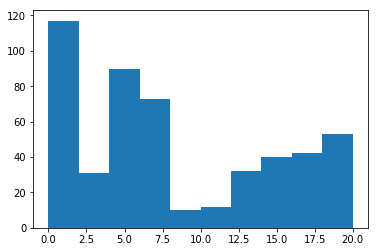

In [372]:
plot.hist(data['Occupation'])

## Logistic Regression ##

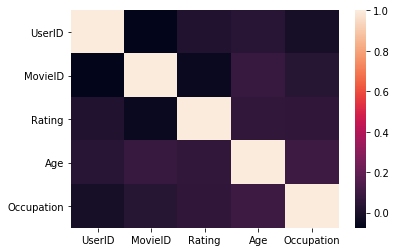

In [420]:
sb.heatmap(data.corr())

In [431]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=5)

print x_train.shape,x_test.shape,y_train.shape,y_test.shape

lrm = LogisticRegression()
model = lrm.fit(x_train,y_train)

predict = lrm.predict(x_test)
#print predict

y = np.array(y_test)

#for i in range(len(y)):
 #   print str(y[i])+" : "+str(predict[i])
    
score = lrm.score(x_test, y_test)
print(score)    

conf = metrics.confusion_matrix(y_test,predict)
print conf

#print y_test,predict

(400, 4) (100, 4) (400,) (100,)
0.36
[[ 0  0  0  5  0]
 [ 0  0  0  5  0]
 [ 0  0  1 31  1]
 [ 0  0  1 33  0]
 [ 0  0  3 18  2]]
